# Announcements

**Project 0**<br>
Brainstorm your ideas and your thought process.

**Teams**<br>
Is there anyone who has no any team yet?

**Assignments and Projects**<br>
For assistance in your assignment or project, if you are close to the deadline (e.g., one day earlier), it may be harder to find help.


# Chapter 3 - Machine Learning Classifiers Using Scikit-Learn

### Book: Python Machine Learning 
https://github.com/rasbt/python-machine-learning-book

[MIT License](https://github.com/rasbt/python-machine-learning-book/blob/master/LICENSE.txt)

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -p numpy,pandas,matplotlib,sklearn

Sebastian Raschka 
last updated: 2017-03-10 

numpy 1.12.0
pandas 0.19.2
matplotlib 2.0.0
sklearn 0.18.1


*The use of `watermark` is optional. You can install this IPython extension via "`pip install watermark`". For more information, please see: https://github.com/rasbt/watermark.*

### Overview

- [Choosing a classification algorithm](#Choosing-a-classification-algorithm)
- [First steps with scikit-learn](#First-steps-with-scikit-learn)
    - [Training a perceptron via scikit-learn](#Training-a-perceptron-via-scikit-learn)
- [Modeling class probabilities via logistic regression](#Modeling-class-probabilities-via-logistic-regression)
    - [Logistic regression intuition and conditional probabilities](#Logistic-regression-intuition-and-conditional-probabilities)
    - [Learning the weights of the logistic cost function](#Learning-the-weights-of-the-logistic-cost-function)
    - [Training a logistic regression model with scikit-learn](#Training-a-logistic-regression-model-with-scikit-learn)
    - [Tackling overfitting via regularization](#Tackling-overfitting-via-regularization)
- [Maximum margin classification with support vector machines](#Maximum-margin-classification-with-support-vector-machines)
    - [Maximum margin intuition](#Maximum-margin-intuition)
    - [Dealing with the nonlinearly separable case using slack variables](#Dealing-with-the-nonlinearly-separable-case-using-slack-variables)
    - [Alternative implementations in scikit-learn](#Alternative-implementations-in-scikit-learn)
- [Solving nonlinear problems using a kernel SVM](#Solving-nonlinear-problems-using-a-kernel-SVM)
    - [Using the kernel trick to find separating hyperplanes in higher dimensional space](#Using-the-kernel-trick-to-find-separating-hyperplanes-in-higher-dimensional-space)
- [Decision tree learning](#Decision-tree-learning)
    - [Maximizing information gain – getting the most bang for the buck](#Maximizing-information-gain-–-getting-the-most-bang-for-the-buck)
    - [Building a decision tree](#Building-a-decision-tree)
    - [Combining weak to strong learners via random forests](#Combining-weak-to-strong-learners-via-random-forests)
- [K-nearest neighbors – a lazy learning algorithm](#K-nearest-neighbors-–-a-lazy-learning-algorithm)
- [Summary](#Summary)

In [2]:
from IPython.display import Image
%matplotlib inline

In [3]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

# Choosing a classification algorithm

# First steps with scikit-learn

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [5]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

Standardizing the features:

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Modeling class probabilities via logistic regression

### Logistic regression intuition and conditional probabilities

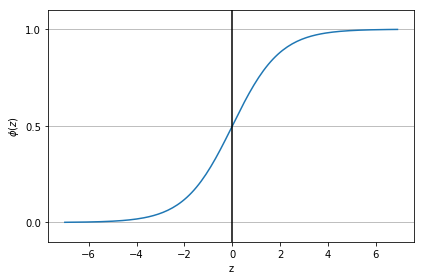

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

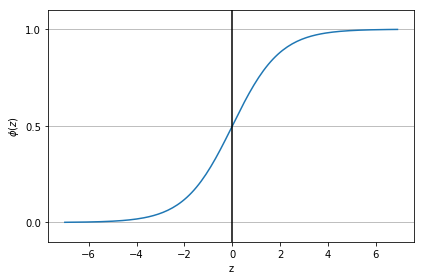

In [13]:
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

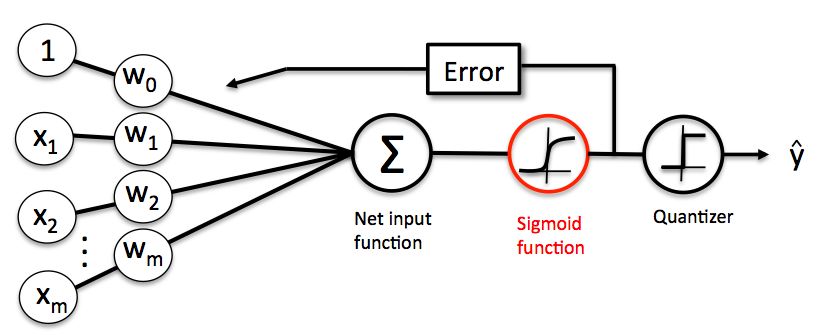

In [14]:
Image(filename='./images/03_03.png', width=500) 

### Learning the weights of the logistic cost function

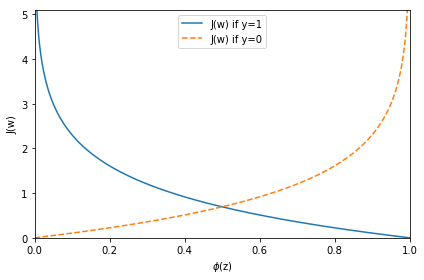

In [15]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

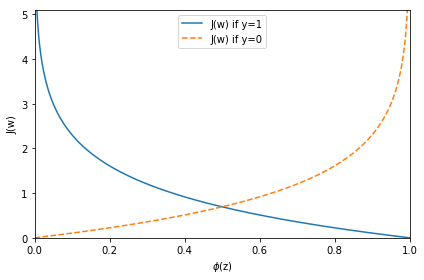

In [15]:
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/log_cost.png', dpi=300)
plt.show()

### Training a logistic regression model with scikit-learn

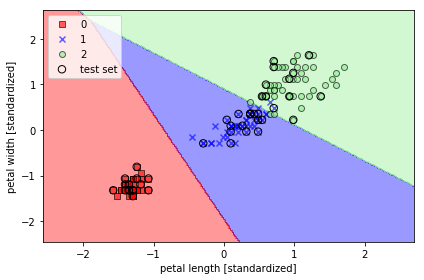

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

In [17]:
if Version(sklearn_version) < '0.17':
    lr.predict_proba(X_test_std[0, :])
else:
    lr.predict_proba(X_test_std[0, :].reshape(1, -1))

### Tackling overfitting via regularization

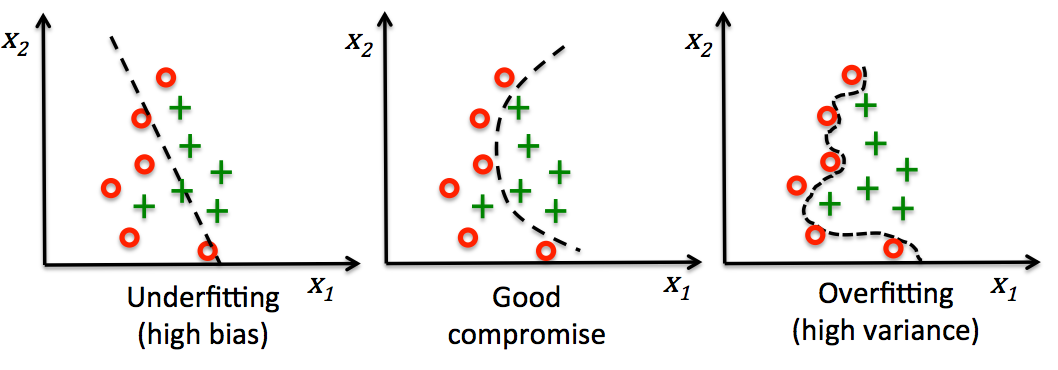

In [18]:
Image(filename='./images/03_06.png', width=700) 

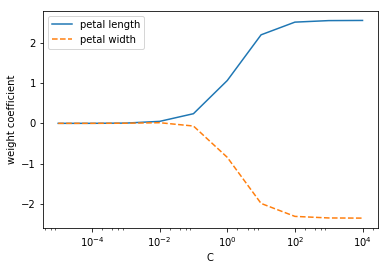

In [19]:
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()

# Decision tree learning

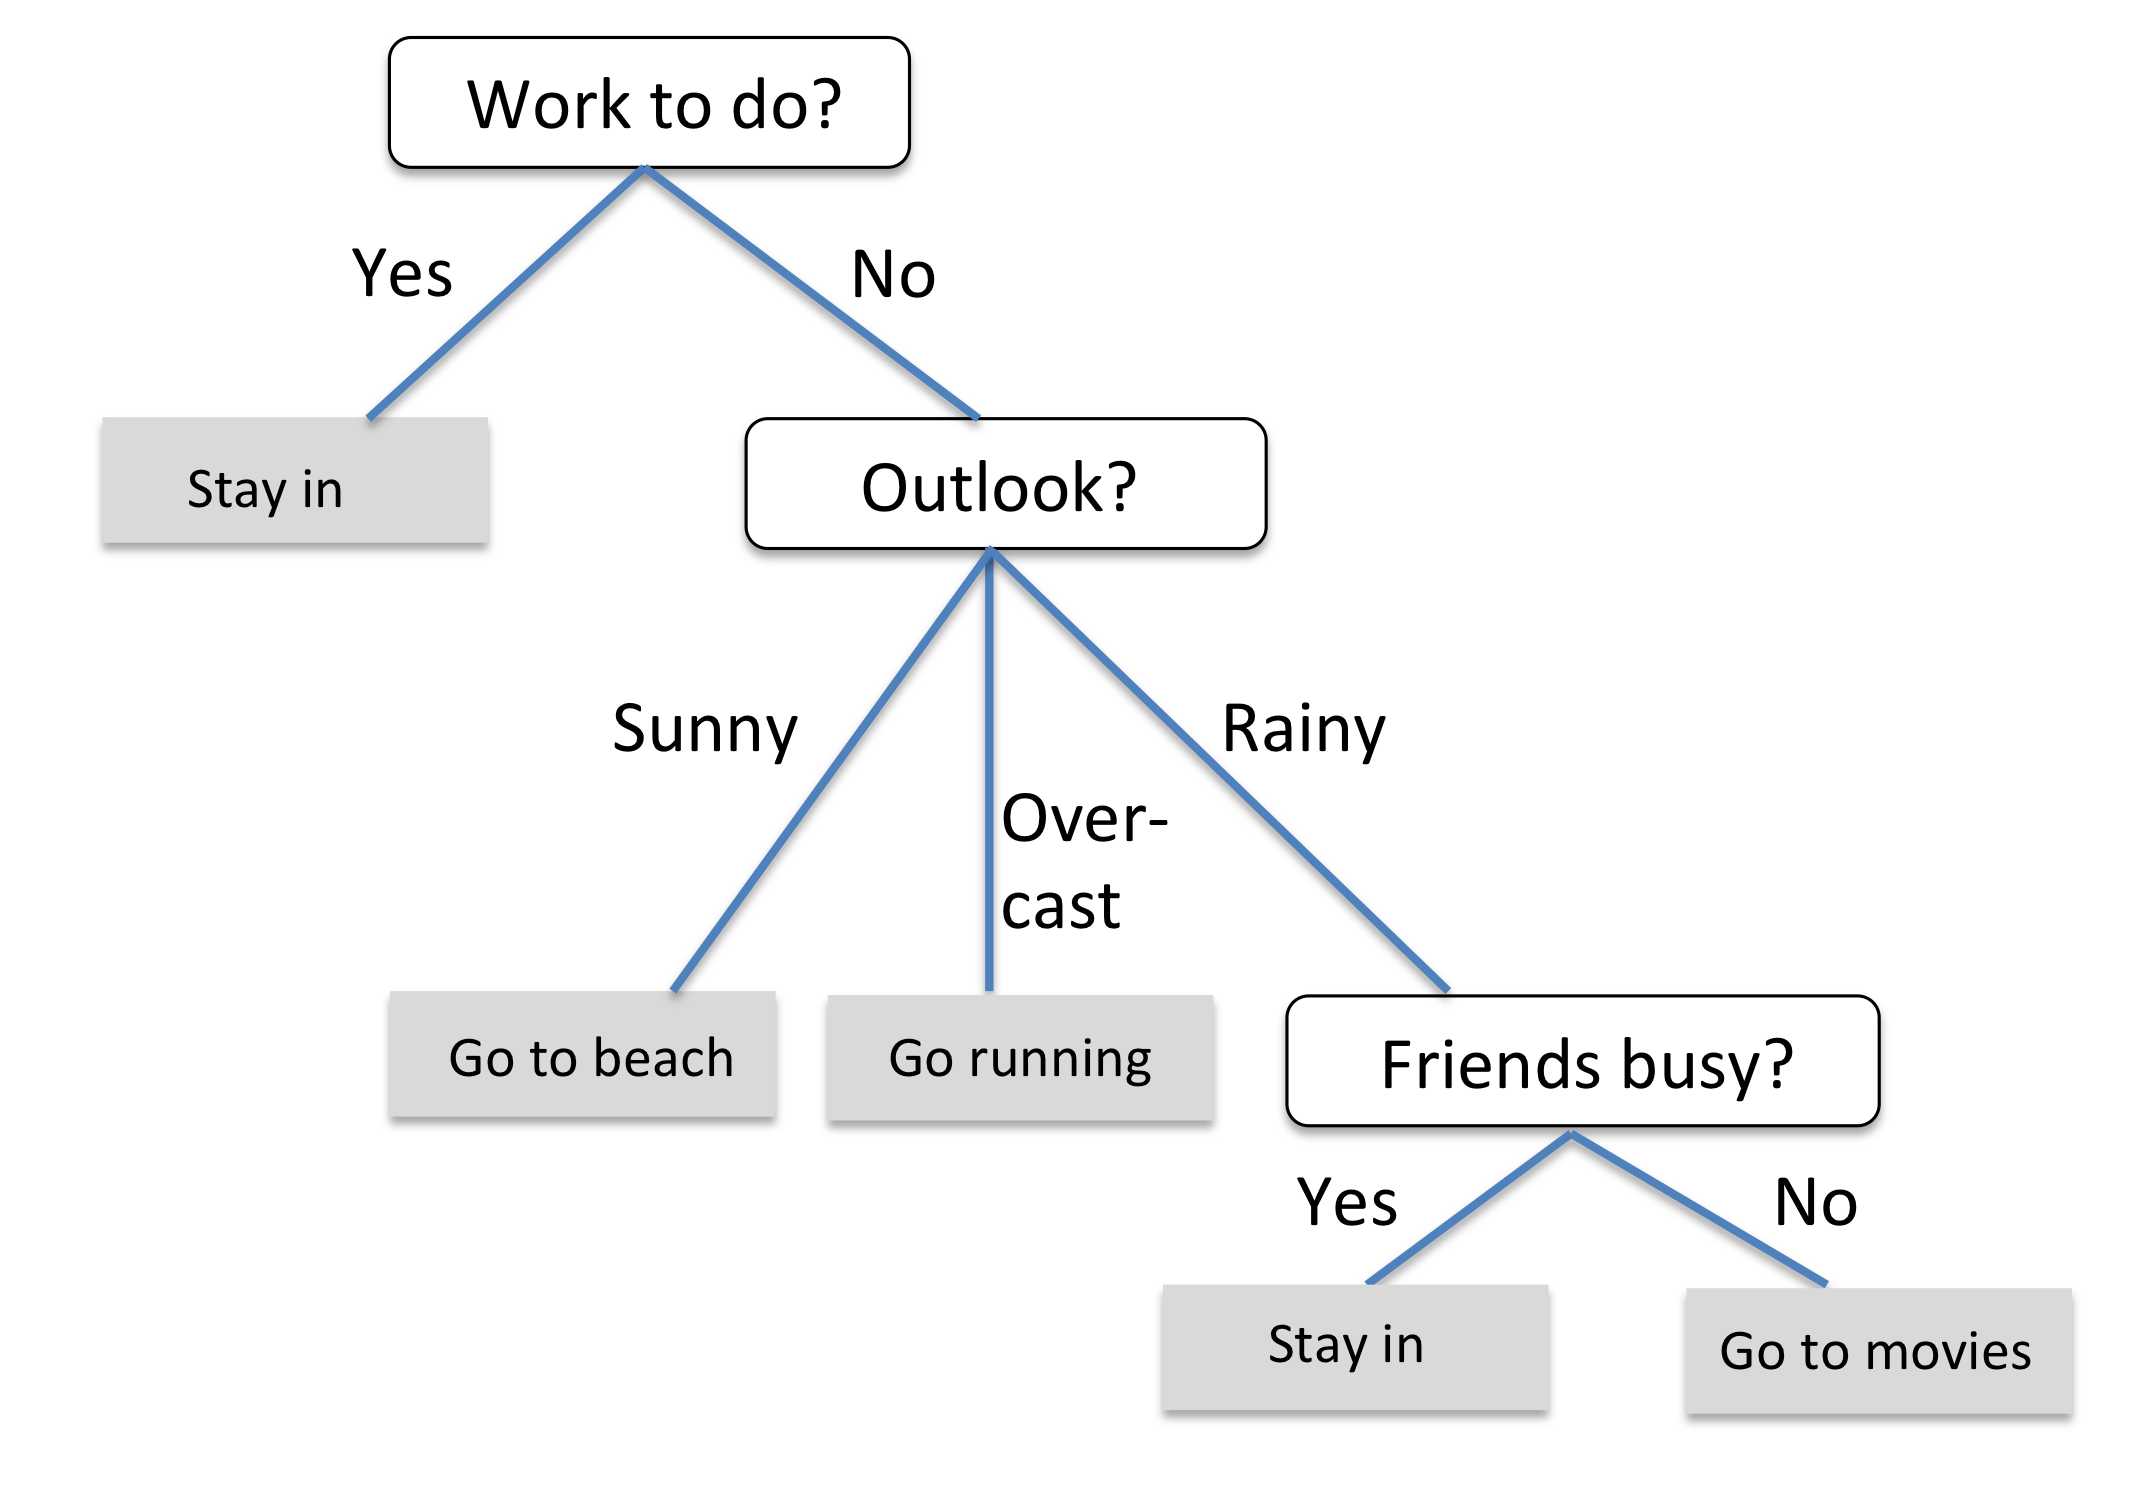

In [28]:
Image(filename='./images/03_15.png', width=500) 

## Maximizing information gain - getting the most bang for the buck

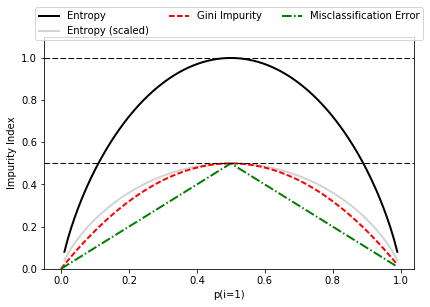

In [29]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])


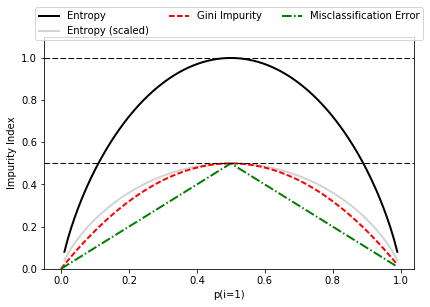

In [29]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
#plt.savefig('./figures/impurity.png', dpi=300, bbox_inches='tight')
plt.show()

## Building a decision tree

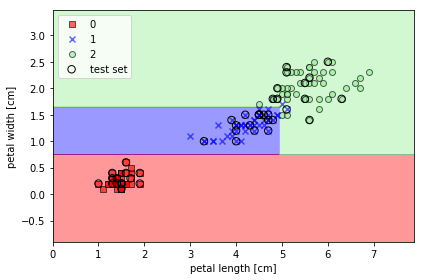

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

In [31]:
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

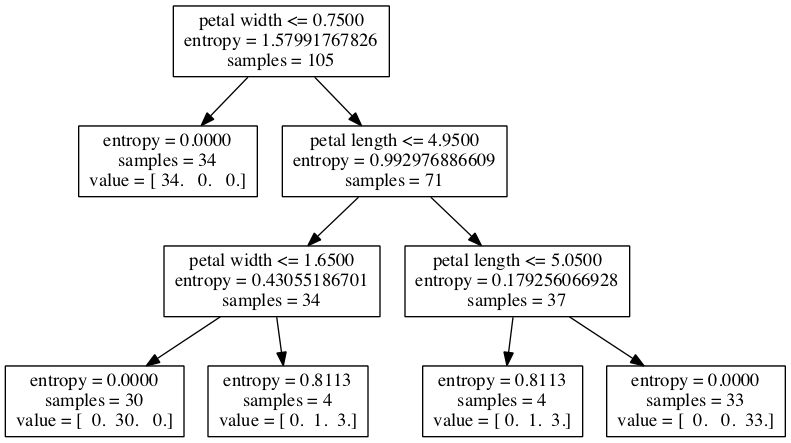

In [32]:
Image(filename='./images/03_18.png', width=600) 

**Note**

If you have scikit-learn 0.18 and pydotplus installed (e.g., you can install it via `pip install pydotplus`), you can also show the decision tree directly without creating a separate dot file as shown below. Also note that `sklearn 0.18` offers a few additional options to make the decision tree visually more appealing.

In [33]:
import pydotplus

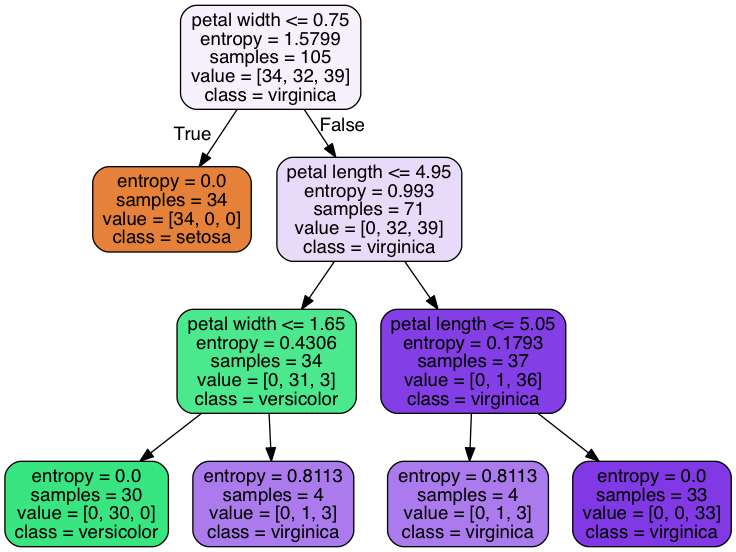

In [34]:
from IPython.display import Image
from IPython.display import display

if Version(sklearn_version) >= '0.18':
    
    try:
        
        import pydotplus
        
        dot_data = export_graphviz(
        tree, 
        out_file=None,
        # the parameters below are new in sklearn 0.18
        feature_names=['petal length', 'petal width'],  
        class_names=['setosa', 'versicolor', 'virginica'],  
        filled=True,
        rounded=True)

        graph = pydotplus.graph_from_dot_data(dot_data)  
        display(Image(graph.create_png()))

    except ImportError:
        print('pydotplus is not installed.')

## Combining weak to strong learners via random forests

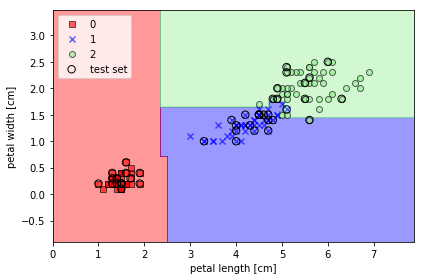

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/random_forest.png', dpi=300)
plt.show()

# Summary

...